# Diabetes Prediction

###Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

###Importing Dataset and Check Data Structure

In [ ]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b1f461490>],
      dtype=object)

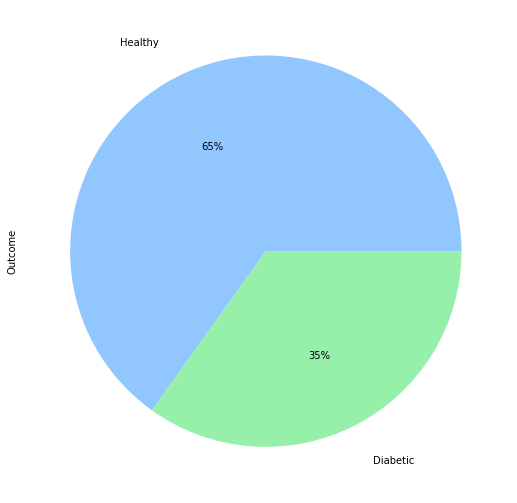

In [ ]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
dataset['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

## Exploratory Data Analysis

### Data Shape

In [ ]:
dataset.shape

(768, 9)

###Check missing values

In [ ]:
# Check if there are any missing values in the dataset

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check database information 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Create a copy of the original dataset and replace the 0 values of the impacted columns with the mean values

dataset_0 = dataset.copy()

coloumn = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in coloumn:
    dataset_0[i].replace(0,dataset_0[i].mean(),inplace=True)

dataset_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
dataset_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


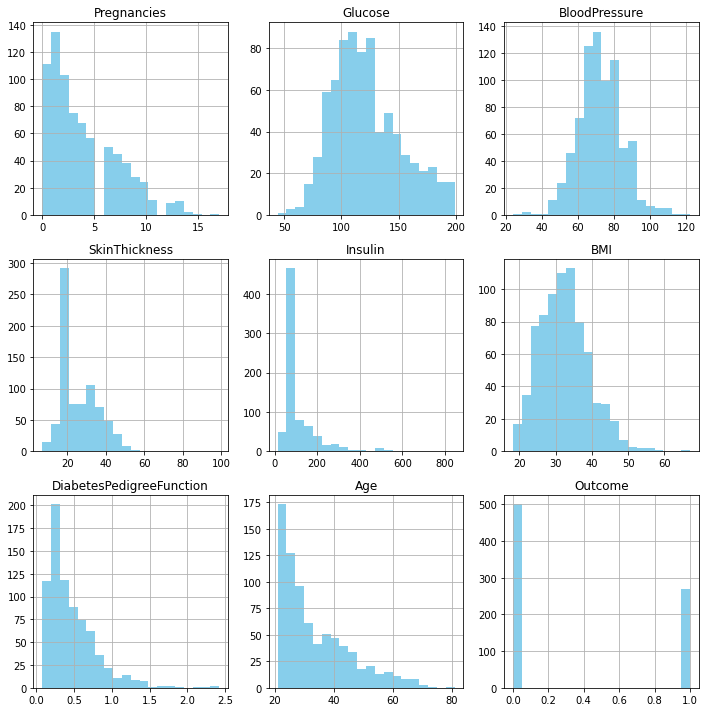

In [ ]:
# Histogram plot of data

col = list(dataset_0.columns)
dataset_0[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3), color='skyblue')
plt.tight_layout()


### Check Outliers of Data

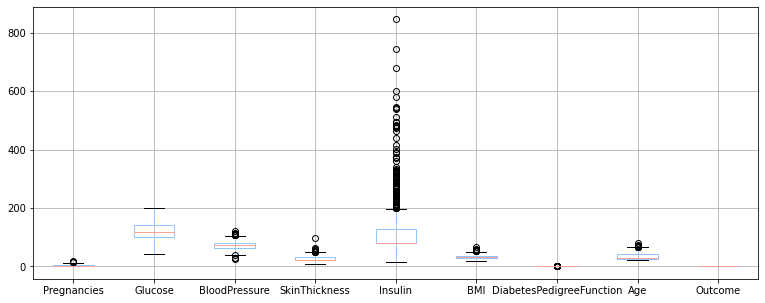

In [ ]:
dataset_0.boxplot(figsize = (13,5))
plt.show()

### Check Correlation of Data

In [ ]:
dataset_0.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


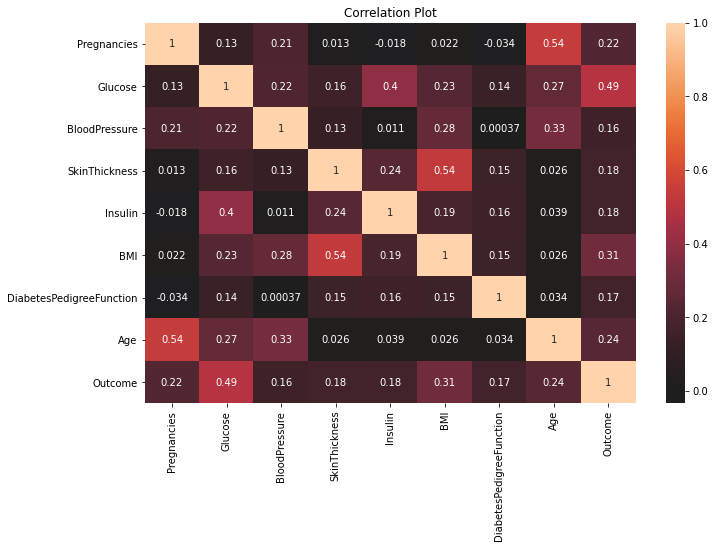

In [ ]:
plt.figure(figsize = (11,7))
sns.heatmap(dataset_0.corr(), center = 0, annot = True,)
plt.title("Correlation Plot")
plt.show()

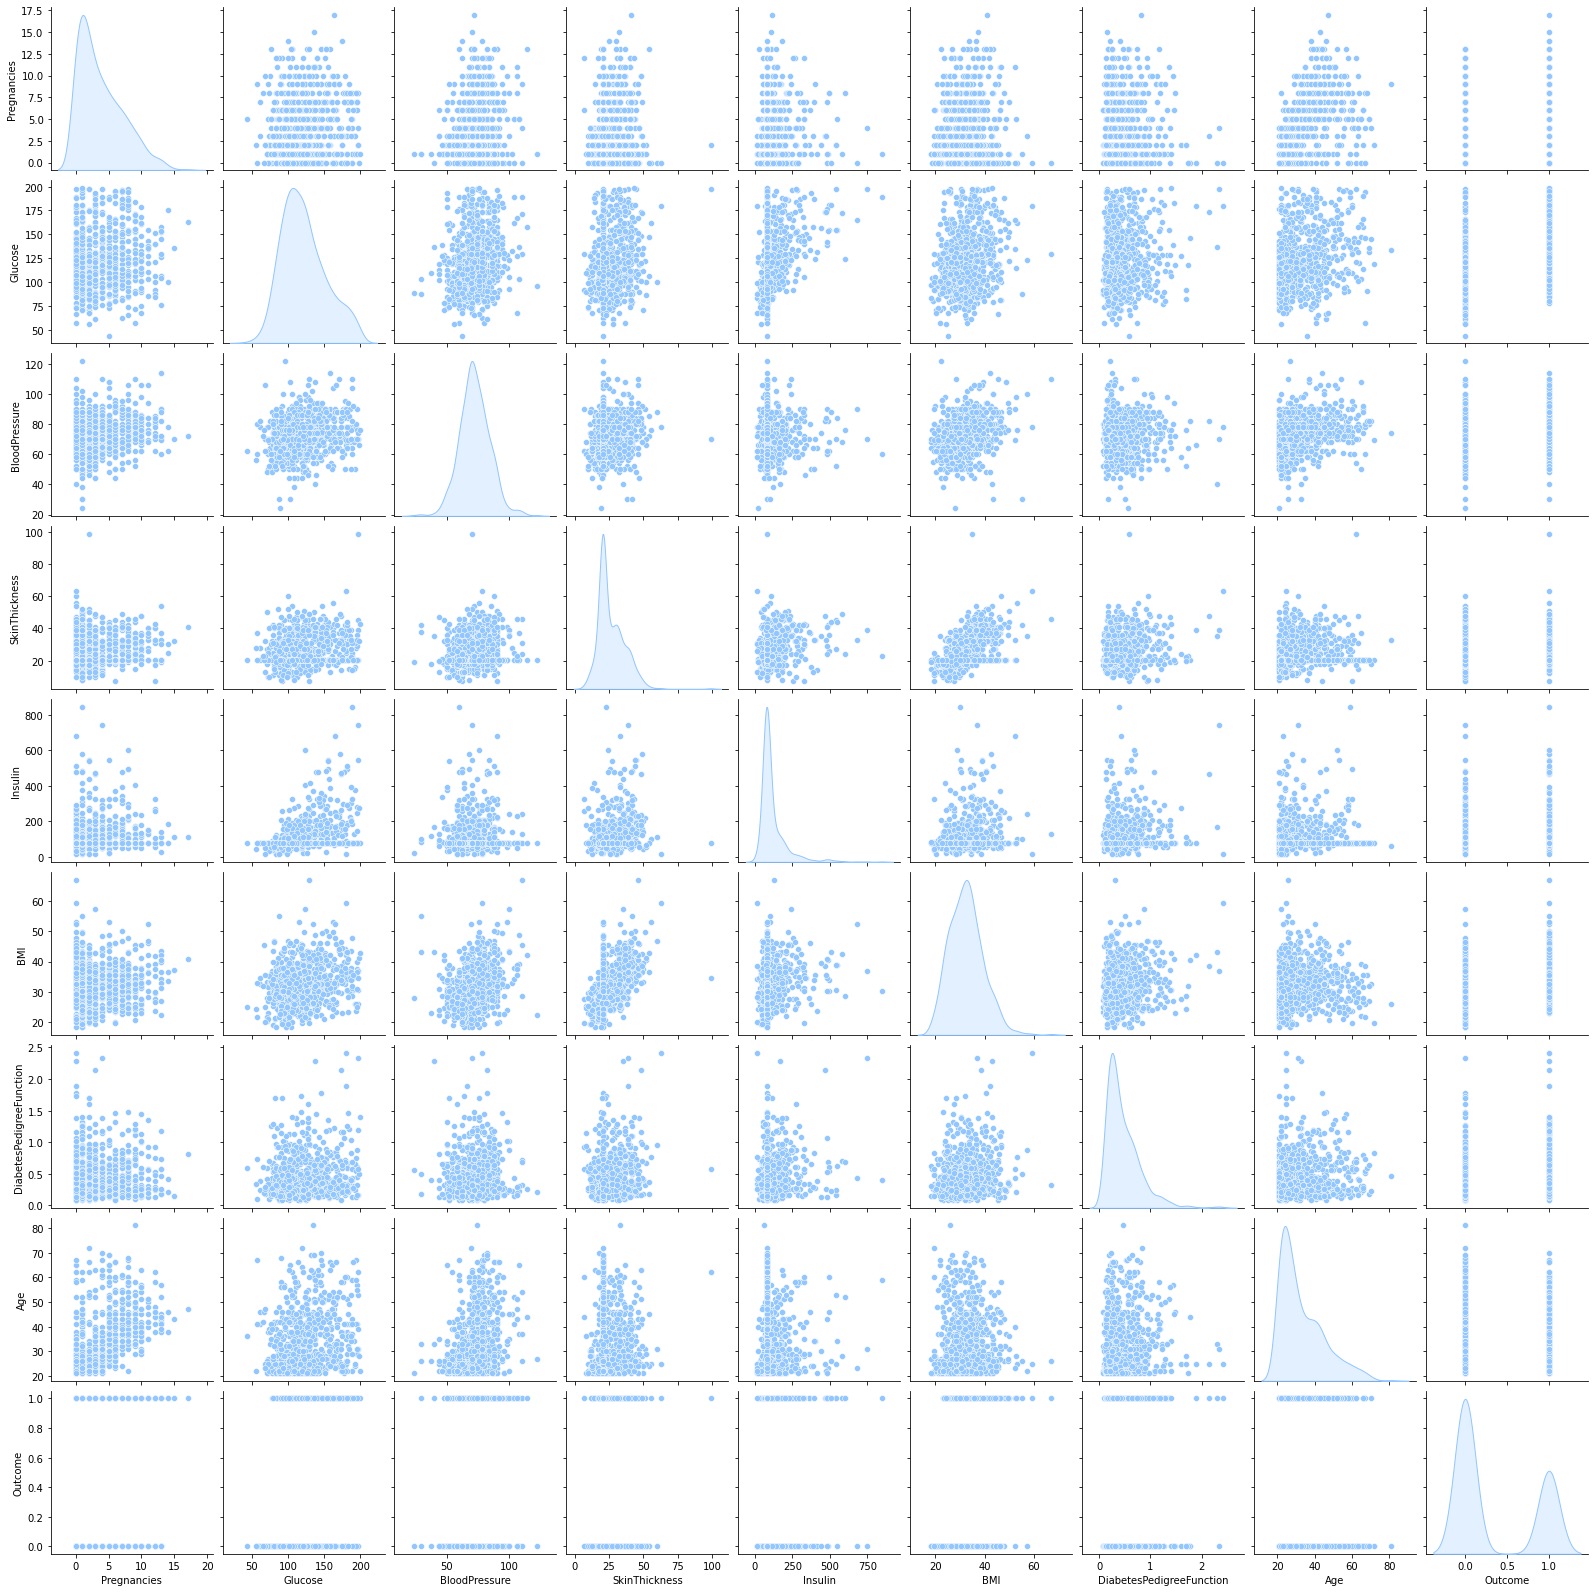

In [ ]:
sns.pairplot(dataset_0,diag_kind='kde');

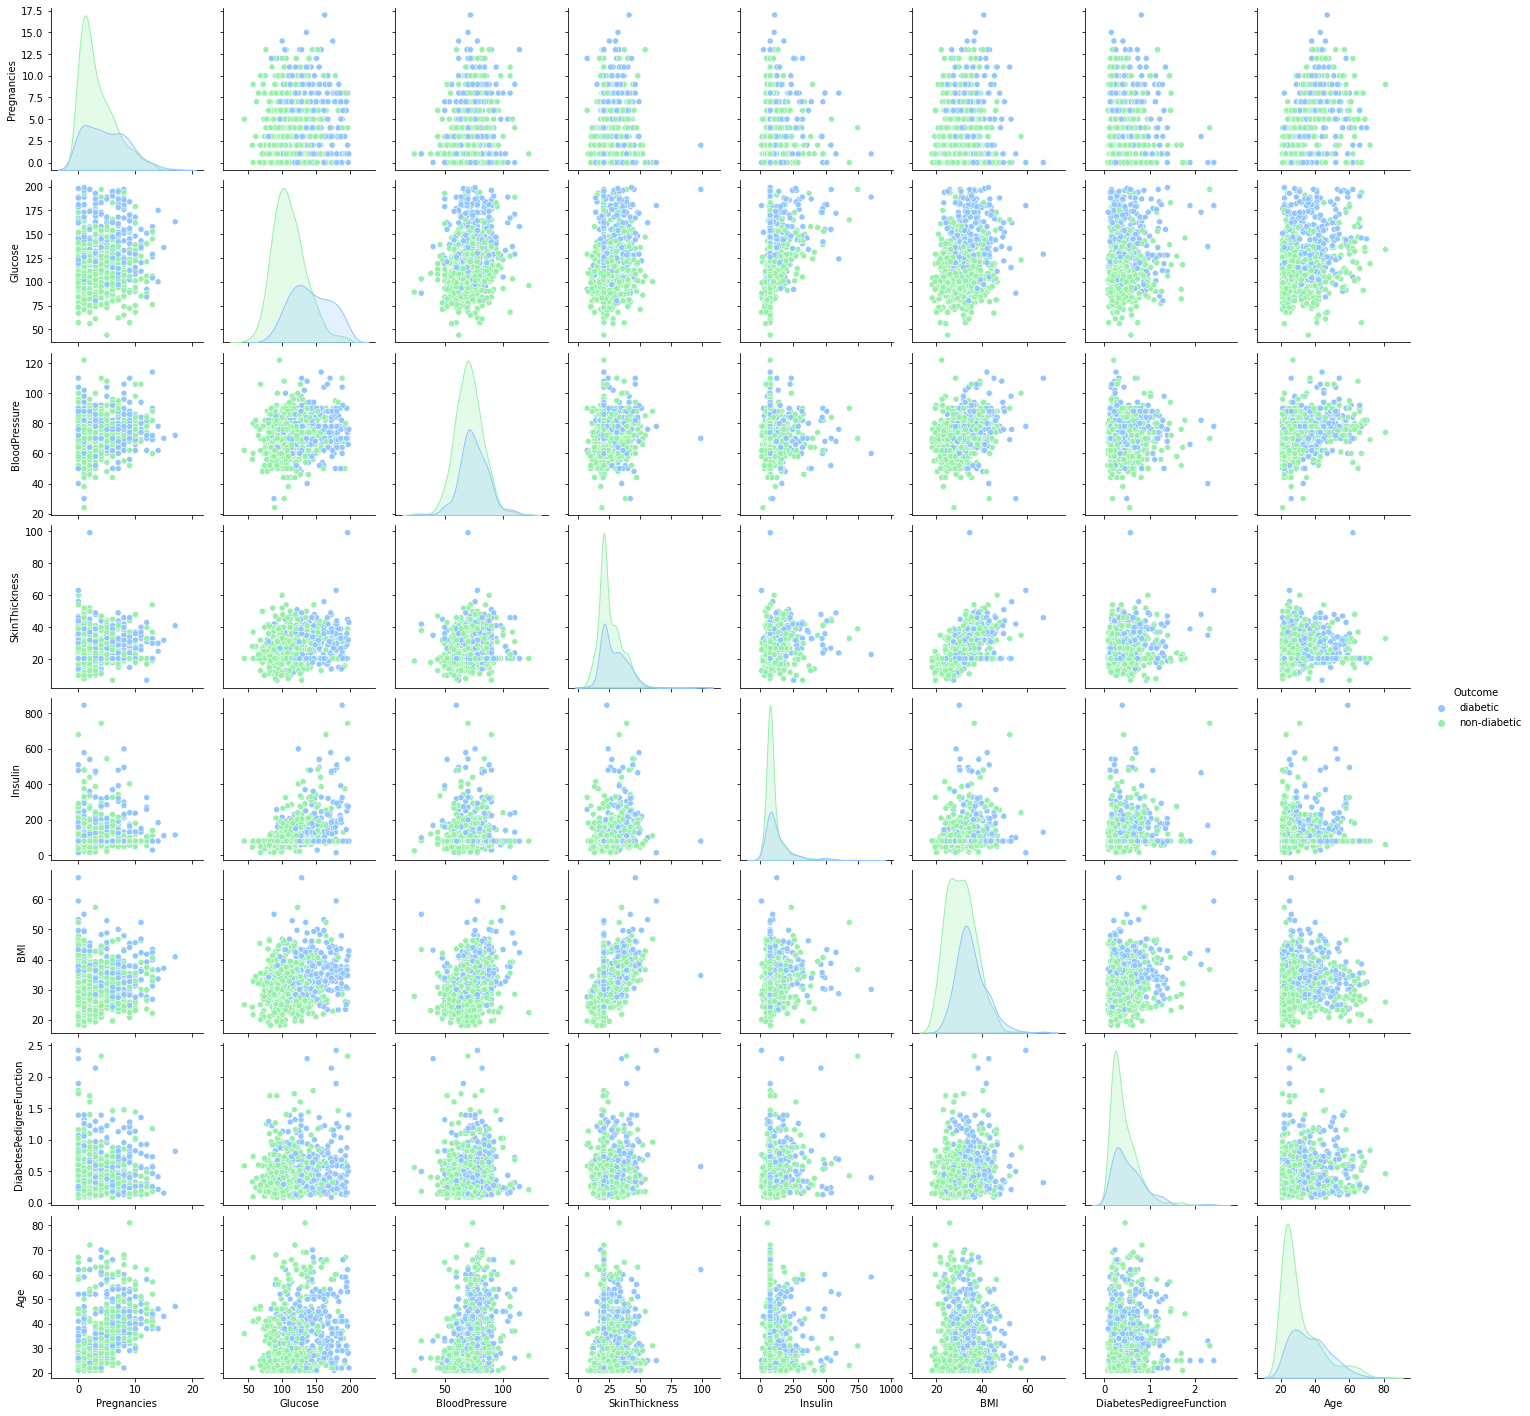

In [ ]:

# Try to plot a pairplot to see which paramaters might have a stronger correlation with either outcomes of diabetic patient
# and non-diabetic patient

dataset_t = dataset_0.copy()

dataset_t['Outcome'].astype('category')
dataset_t['Outcome'].replace(0,"non-diabetic",inplace=True)
dataset_t['Outcome'].replace(1,"diabetic",inplace=True)

sns.pairplot(dataset_t,hue='Outcome',diag_kind='kde');

### Spliting of Dataset (Training/ Validation/ Testing)

In [ ]:
x = dataset_0.iloc[:, :-1].values
y = dataset_0.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.90832902  0.93644016  0.45816047 ...  0.36864973  0.67740401
   1.69955804]
 [ 0.03644676 -0.81628595 -1.03864035 ... -0.63292879 -0.07049698
  -0.96569189]
 [-1.12606292  1.43249471  1.45602768 ...  2.81536295 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.91549686 -0.62286235 ... -1.13371805 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.2131296   0.12553806 ... -0.36107176 -0.50001442
   0.11706589]
 [ 0.32707418  0.4734559   0.79078287 ... -0.09027668  0.52121586
   2.94889395]]


In [ ]:
print(x_test)

[[-0.8354355   2.55688505  0.29184926 ...  1.47038609  2.78594417
  -0.96569189]
 [-0.54480808 -0.48558291  0.12553806 ...  0.13971749 -0.1876381
  -0.88240283]
 [ 0.03644676 -1.51076233 -0.87232915 ...  0.19695055 -0.22668514
  -0.71582471]
 ...
 [ 0.03644676  0.67187772  1.12340527 ...  1.627777    0.53623395
  -0.96569189]
 [-0.25418066 -0.18795018  0.12553806 ... -0.90478581 -1.07971278
  -0.79911377]
 [-0.8354355  -0.48558291 -0.04077314 ... -0.26091391  1.06487079
  -0.79911377]]


##Imbalanced Dataset (Is there a need for Upsampling/Downsampling?)


In [ ]:
dataset_0['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Using SMOTE(Synthetic Minority Over Sampling Technique) to increase the number of samples of diabetic patients for training 
# dataset.
from imblearn.over_sampling import SMOTE
print("Before Upsampling, no. of samples in the training dataset: {}".format(len(x_train)))
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1,k_neighbors = 5, random_state=1)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.ravel())

print("After Upsampling, no. of samples in the training dataset: {}".format(len(x_train_sm)))
print("After UpSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_sm==0)))

Before Upsampling, no. of samples in the training dataset: 614
Before UpSampling, counts of label '1': 221
Before UpSampling, counts of label '0': 393 

After Upsampling, no. of samples in the training dataset: 786
After UpSampling, counts of label '1': 393
After UpSampling, counts of label '0': 393 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



# Perform Machine Learning Algorithms

## Training the Logistic Regression Model on the Training Set

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty': ['l1','l2', 'elasticnet'],'C': np.arange(start=1, stop=100, step=1), 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
log_reg = LogisticRegression(solver='liblinear')
clf = GridSearchCV(log_reg, param_grid = parameters, cv=5, verbose=True, n_jobs=-1)

In [ ]:
clf.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 1485 candidates, totalling 7425 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1030 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7422 out of 7425 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 7425 out of 7425 | elapsed:   13.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,...
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97

In [ ]:
clf.best_params_

{'C': 3, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
clf.best_score_

0.7544384423123438

In [ ]:
tuned_log_reg_model = LogisticRegression(solver='liblinear', C = 3, penalty='l1')

In [ ]:
tuned_log_reg_model.fit(x_train_sm, y_train_sm)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the Test set results

In [ ]:
y_pred = tuned_log_reg_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

### Making the Confusion Matrix

Accuracy on Test Data: 77.27272727272727%
Precision Score: 0.6
Recall Score: 0.7659574468085106
F1 Score: 0.6728971962616823


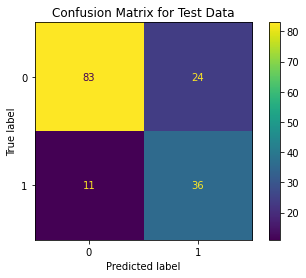

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred = tuned_log_reg_model.predict(x_test)
log_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {log_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix(tuned_log_reg_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 76.0586319218241%


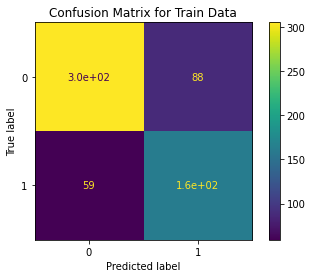

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_log_reg_model.predict(x_train)
log_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {log_train_acc*100}%")
plot_confusion_matrix(tuned_log_reg_model , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

## Training the Support Vector Machine (SVM) Model on the Training Set

In [ ]:
from sklearn.svm import SVC
parameters = {'C':np.arange(start=1, stop=10, step=1), 'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],   'gamma': [1e-3, 1e-4]}
svm = SVC(probability = True)

clf = GridSearchCV(svm, parameters)

In [ ]:
clf.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'C': 9, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.753180682093042

In [ ]:
tuned_svm_model = SVC(probability=True, C = 9, gamma=0.001, kernel='linear')

In [ ]:
tuned_svm_model.fit(x_train_sm, y_train_sm)

SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Predicting the Test set results

In [ ]:
y_pred = tuned_svm_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

### Making the Confusion Matrix

Accuracy on Test Data: 75.32467532467533%
Precision Score: 0.5789473684210527
Recall Score: 0.7021276595744681
F1 Score: 0.6346153846153846


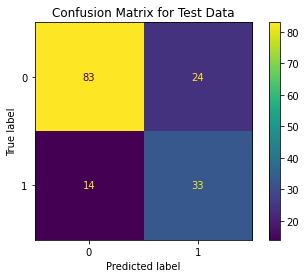

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred = tuned_svm_model.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { svm_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix( tuned_svm_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 76.54723127035831%


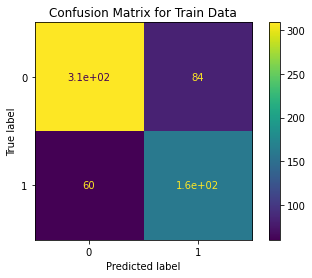

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_svm_model.predict(x_train)
svm_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {svm_train_acc*100}%")
plot_confusion_matrix(tuned_svm_model , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

## Training the K-NN Model on the Training Set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': np.arange(start=1, stop=10, step=1), 'metric': ['euclidean','manhattan','chebyshev','minkowski'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, parameters)

In [ ]:
clf.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'algorithm': 'brute', 'metric': 'chebyshev', 'n_neighbors': 1}

In [ ]:
clf.best_score_

0.8181085221317422

In [ ]:
tuned_knn_model = KNeighborsClassifier(algorithm = 'brute', metric= 'chebyshev', n_neighbors=1)

In [ ]:
tuned_knn_model.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predicting the Test set Result



In [ ]:
y_pred = tuned_knn_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

###Making the Confusion Matrix

Accuracy on Test Data: 69.48051948051948%
Precision Score: 0.5
Recall Score: 0.5957446808510638
F1 Score: 0.5436893203883495


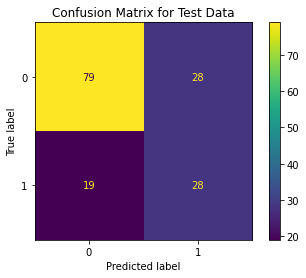

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred =tuned_knn_model.predict(x_test)
KNN_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { KNN_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix( tuned_knn_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 100.0%


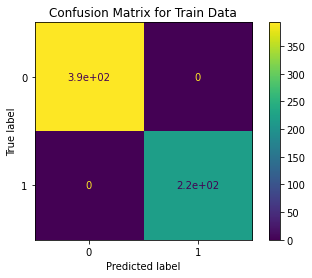

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_knn_model.predict(x_train)
knn_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {knn_train_acc*100}%")
plot_confusion_matrix(tuned_knn_model , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

##  Decision Trees Model 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini','entropy'], 'splitter':['best' , 'random'], 'max_depth': range(1,10), 
              'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009] }
dt = DecisionTreeClassifier(random_state = 0)
clf = GridSearchCV(dt, parameters)

In [ ]:
clf.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
             

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_impurity_decrease': 0.0007,
 'splitter': 'random'}

In [ ]:
clf.best_score_

0.7634523905506733

In [ ]:
tuned_dt_model = DecisionTreeClassifier(random_state = 0,criterion='gini', max_depth=9, min_impurity_decrease=0.0007,splitter='random')

In [ ]:
tuned_dt_model.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0007, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

### Predictiong the Test Result


In [ ]:
y_pred = tuned_dt_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

### Making the Confusion Matrix

Accuracy on Test Data: 74.67532467532467%
Precision Score: 0.5740740740740741
Recall Score: 0.6595744680851063
F1 Score: 0.613861386138614


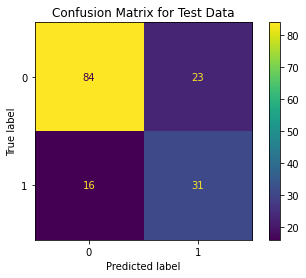

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred = tuned_dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { dt_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix( tuned_dt_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 83.55048859934854%


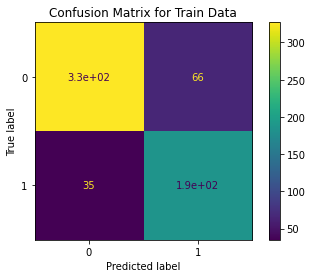

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_dt_model.predict(x_train)
dt_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {dt_train_acc*100}%")
plot_confusion_matrix( tuned_dt_model , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

## Training the Random Forest Model on the Training Set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(start=1, stop=20, step=1),'n_estimators': np.arange(start=100, stop=1000, step=100), 'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = RandomizedSearchCV(rf, parameters)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 900}

In [ ]:
clf.best_score_

0.8257034588406033

In [ ]:
tuned_rf_model = RandomForestClassifier(criterion = 'entropy', max_depth= 19, max_features='auto', n_estimators = 700 )

In [ ]:
tuned_rf_model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictiong the Test Result


In [ ]:
y_pred = tuned_rf_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

### Making the Confusion Matrix

Accuracy on Test Data: 82.46753246753246%
Precision Score: 0.6851851851851852
Recall Score: 0.7872340425531915
F1 Score: 0.7326732673267328


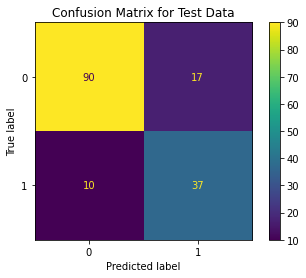

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred = tuned_rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { rf_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix(  tuned_rf_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 100.0%


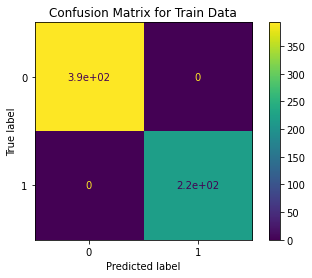

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_rf_model.predict(x_train)
rf_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {rf_train_acc*100}%")
plot_confusion_matrix(tuned_rf_model , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

## Training the Naive Bayes Model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_sm, y_train_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test Set Results

In [ ]:
y_pred = nb.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

###Making the Confusion Matrix

Accuracy on Test Data: 77.92207792207793%
Precision Score: 0.6181818181818182
Recall Score: 0.723404255319149
F1 Score: 0.6666666666666667


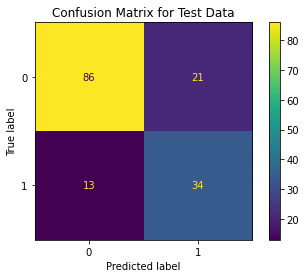

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred = nb.predict(x_test)
nb_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { nb_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix( nb, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 74.42996742671009%


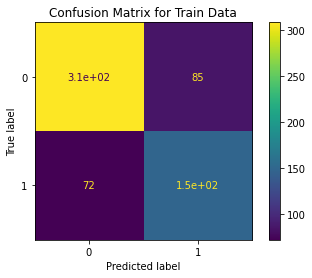

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = nb.predict(x_train)
nb_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {nb_train_acc*100}%")
plot_confusion_matrix( nb , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

## Training the XGBoost Model on the Training set

In [ ]:
from xgboost import XGBClassifier
parameters = {'max_depth': np.arange(start = 10, stop=20, step = 1), 'learning_rate' :np.linspace(start=0.01, stop=0.1, num=50) , 'n_estimators' : np.arange(start=10, stop=100, step=1),
              'gamma': np.linspace(start=0.1, stop=1, num=10), 'min_child_weight' : np.arange(start=1, stop=10 ,step=1), 'colsample_bytree' : np.linspace(start=0.1, stop=1, num=20), 'subsample' : np.linspace(start=0.1, stop=1, num=20) }
xg = XGBClassifier()
clf = RandomizedSearchCV(xg, parameters)
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'subsample': array([0.1       , 0.

In [ ]:
clf.best_params_

{'colsample_bytree': 0.7157894736842105,
 'gamma': 0.2,
 'learning_rate': 0.04306122448979592,
 'max_depth': 19,
 'min_child_weight': 7,
 'n_estimators': 59,
 'subsample': 0.9052631578947369}

In [ ]:
clf.best_score_

0.7939047004756914

In [ ]:
tuned_xg_model = XGBClassifier(gamma =0.6, learning_rate = 0.06510204081632653,  max_depth= 18 , n_estimators = 57, min_child_weight = 2, colsample_bytree =1.0, subsample =0.6210526315789474)

In [ ]:
tuned_xg_model.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.6,
              learning_rate=0.06510204081632653, max_delta_step=0, max_depth=18,
              min_child_weight=2, missing=None, n_estimators=57, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6210526315789474, verbosity=1)

## Predicting the Test Set Results

In [ ]:
y_pred = tuned_xg_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

## Making the Confusion Matrix

Accuracy on Test Data: 83.11688311688312%
Precision Score: 0.6842105263157895
Recall Score: 0.8297872340425532
F1 Score: 0.7499999999999999


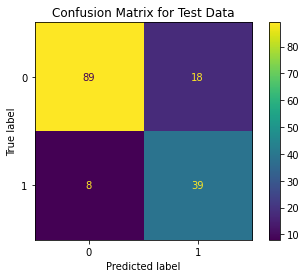

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
y_pred = tuned_xg_model.predict(x_test)
xg_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { xg_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix( tuned_xg_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Train Data: 91.69381107491856%


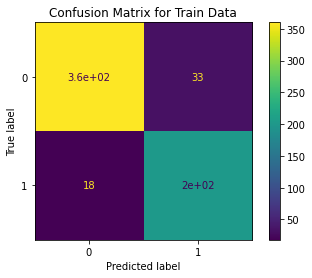

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_xg_model.predict(x_train)
xg_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {xg_train_acc*100}%")
plot_confusion_matrix(tuned_xg_model, x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

# Summary of the Predictions

### Summary for the Test Set Results

In [ ]:
models = pd.DataFrame({
    'models': ['Logistic Regression', 'K-NN', 'Decision Tree Classifier', 'SVM', 'Random Forrest', 'Naive Bayes', 'XGBoost'],
    'score': [ log_acc, KNN_acc, dt_acc, svm_acc, rf_acc, nb_acc, xg_acc ]
})

models.sort_values(by = 'score', ascending = False)

,models,score
6,XGBoost,0.831169
4,Random Forrest,0.824675
5,Naive Bayes,0.779221
0,Logistic Regression,0.772727
3,SVM,0.753247
2,Decision Tree Classifier,0.746753
1,K-NN,0.694805


# Visualizing the Summary of Prediction

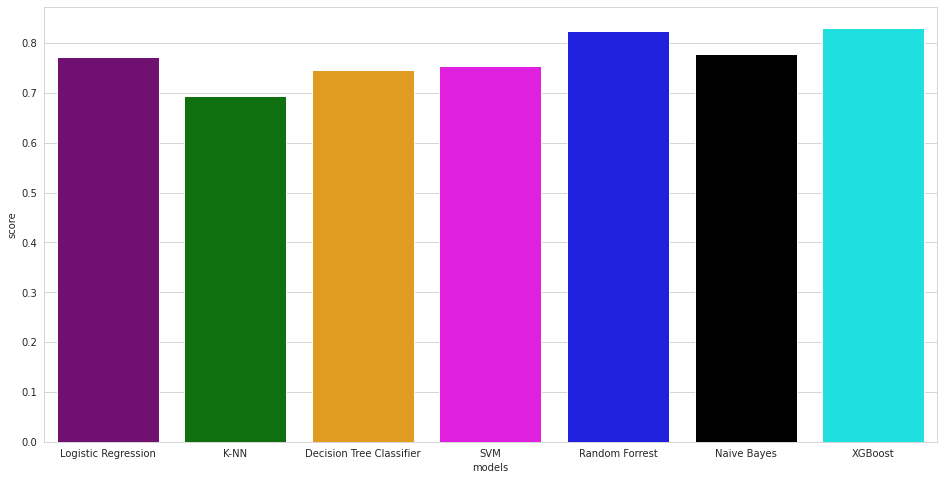

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue", "black", "cyan"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['models'],y=models['score'], palette=colors )
plt.show()

### Summary for the Train Set Results

In [ ]:
models = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-NN', 'Decision Tree Classifier', 'SVM', 'Random Forrest', 'Naive Bayes', 'XGBoost'],
    'Score': [ log_train_acc, knn_train_acc, dt_train_acc, svm_train_acc, rf_train_acc, nb_train_acc, xg_train_acc ]
})

models.sort_values(by = 'Score', ascending = False)

,Models,Score
1,K-NN,1.000000
4,Random Forrest,1.000000
6,XGBoost,0.916938
2,Decision Tree Classifier,0.835505
3,SVM,0.765472
0,Logistic Regression,0.760586
5,Naive Bayes,0.744300


# Visualizing the Summary of Prediction

In [ ]:
from pandas import DataFrame
Model=[['Logistic Regression', log_acc], ['K-NN', KNN_acc], ['Decession Trees', dt_acc], ['SVM', svm_acc], ['Random Forrest', rf_acc], ['Naive Bayes', nb_acc], ['XG Boost', xg_acc]]
dx= DataFrame(model,columns= ["model","score"])


ax= px.bar(dx,x= "model",y="score",title= "Summary of ML Models",color= "model")
ax.show()